In [47]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')


# import libraries from tensorflow
from tensorflow import keras
import tensorflow as tf
from keras import backend as K
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout,Input, BatchNormalization, LeakyReLU, ReLU
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from keras.utils.vis_utils import plot_model
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.initializers import HeUniform

In [49]:
# Data source - "https://www.kaggle.com/datasets/oddrationale/mnist-in-csv/code"

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [50]:
print(x_train.shape)
print(y_train.shape)

(60000, 28, 28)
(60000,)


In [51]:
print(x_test.shape)
print(y_test.shape)

(10000, 28, 28)
(10000,)


In [52]:
x_train[10][10][11:20]

array([  0,   0,  24, 209, 254, 254, 254, 171,   0], dtype=uint8)

In [53]:
y_train[0:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [54]:
y_test[0:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [55]:
# Split the train data into train and val set

X_train,X_val,Y_train,Y_val = train_test_split(x_train,y_train, test_size=0.2,random_state=27)

In [56]:
# Checking the shape of data

X_train.shape,X_val.shape, Y_train.shape,Y_val.shape

((48000, 28, 28), (12000, 28, 28), (48000,), (12000,))

In [57]:
X_train[5].shape

(28, 28)

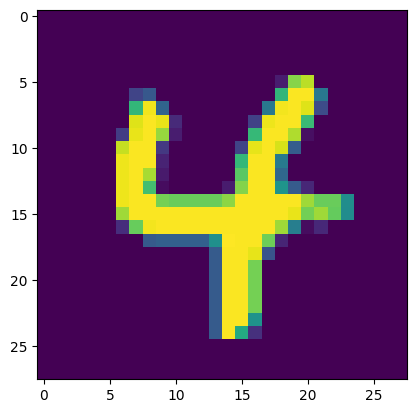

In [58]:
plt.imshow(X_train[90])

In [59]:
# Verify the label

Y_train[90]

4

In [60]:
# Scaling and modify dataset

X_train_std= X_train.astype('float32')
X_val_std= X_val.astype('float32')
X_train_std /= 255
X_val_std /=255

In [61]:
X_test_std= x_test.astype('float32')
X_test_std = x_test/255

In [62]:
X_train_std[10][10]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.6627451 , 0.99607843,
       0.99607843, 0.9137255 , 0.44313726, 0.22745098, 0.        ,
       0.        , 0.        , 0.1764706 , 0.8352941 , 0.99607843,
       0.9764706 , 0.12156863, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        ], dtype=float32)

In [63]:
# One hot encoding of the target columns

Y_train_cat=tf.keras.utils.to_categorical(Y_train)
Y_val_cat=tf.keras.utils.to_categorical(Y_val)

In [64]:
Y_test_cat=tf.keras.utils.to_categorical(y_test)

In [65]:
# Create a Deep Neural Network Model for Classification

# Intialize the model

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Reshape((784,),input_shape=(28,28,)))

In [66]:
# Hidden layers

model.add(tf.keras.layers.Dense(32, activation='sigmoid'))

In [67]:
# Output layer

model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [68]:
# Model Summary

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape_3 (Reshape)         (None, 784)               0         
                                                                 
 dense_12 (Dense)            (None, 32)                25120     
                                                                 
 dense_13 (Dense)            (None, 10)                330       
                                                                 
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________


In [69]:
# Compile the model

callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience = 2,restore_best_weights=True)
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.002),
              loss='categorical_crossentropy', metrics=['accuracy'])

In [70]:
# Fitting the model

train = model.fit(X_train_std, Y_train_cat,
                  validation_data=(X_val_std,Y_val_cat),
                  epochs=20,batch_size=32,
                  callbacks=callback)

Epoch 1/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.4711 - accuracy: 0.8866 - val_loss: 0.2653 - val_accuracy: 0.9252
Epoch 2/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2161 - accuracy: 0.9397 - val_loss: 0.2067 - val_accuracy: 0.9393
Epoch 3/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.1689 - accuracy: 0.9518 - val_loss: 0.1767 - val_accuracy: 0.9489
Epoch 4/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.1417 - accuracy: 0.9592 - val_loss: 0.1594 - val_accuracy: 0.9535
Epoch 5/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.1233 - accuracy: 0.9651 - val_loss: 0.1493 - val_accuracy: 0.9567
Epoch 6/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.1095 - accuracy: 0.9689 - val_loss: 0.1438 - val_accuracy: 0.9564
Epoch 7/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0991 - accuracy: 0.9716 - val_loss: 0.1395 - val_accuracy:

In [71]:
# Predicting X_test basis the built model

y_pred = np.argmax(model.predict(X_test_std), axis=1)
y_pred

313/313 [==============================] - 1s 2ms/step


array([7, 2, 1, ..., 4, 5, 6])

In [72]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test,y_pred)

array([[ 965,    0,    2,    1,    0,    3,    7,    1,    1,    0],
       [   0, 1115,    2,    3,    0,    0,    5,    3,    7,    0],
       [   6,    1,  979,    4,    8,    2,    4,    7,   19,    2],
       [   0,    0,    6,  968,    0,   12,    0,    9,   10,    5],
       [   3,    0,    3,    0,  937,    0,   13,    5,    1,   20],
       [   2,    0,    1,   14,    2,  846,   10,    2,   11,    4],
       [   9,    3,    1,    0,    2,   10,  931,    1,    1,    0],
       [   2,    5,   13,    5,    5,    0,    0,  989,    2,    7],
       [   5,    3,    3,    4,    5,    5,    2,    5,  937,    5],
       [   3,    5,    0,    5,   17,    8,    1,    7,    5,  958]])

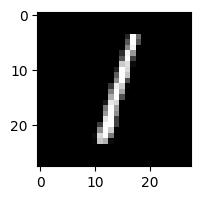

Actual Label: 1
Predicted Label: 1
_______________________________________


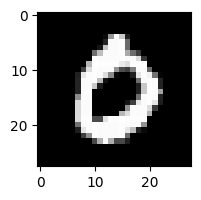

Actual Label: 0
Predicted Label: 0
_______________________________________


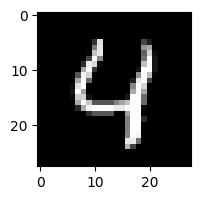

Actual Label: 4
Predicted Label: 4
_______________________________________


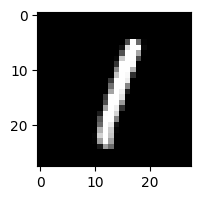

Actual Label: 1
Predicted Label: 1
_______________________________________


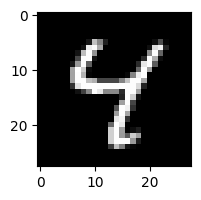

Actual Label: 4
Predicted Label: 4
_______________________________________


In [73]:
# validaitng the prediction that is run on X-test after model building with the actual values in X_test

for i in range(2,7):
  plt.figure(figsize=(2,2))
  plt.imshow(X_test_std[i], cmap='gray')
  plt.show()
  print('Actual Label:',y_test[i])

  print('Predicted Label:',y_pred[i])
  print('_______________________________________')

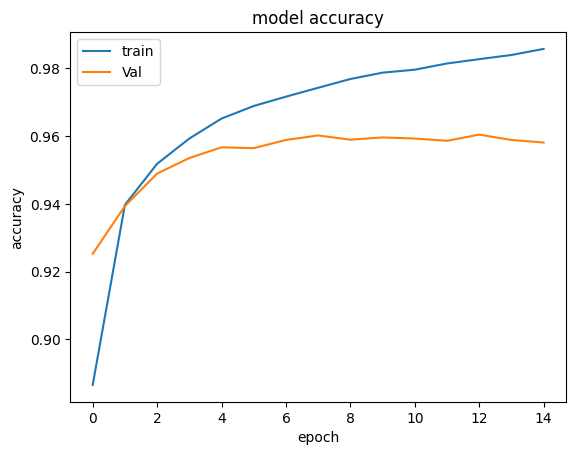

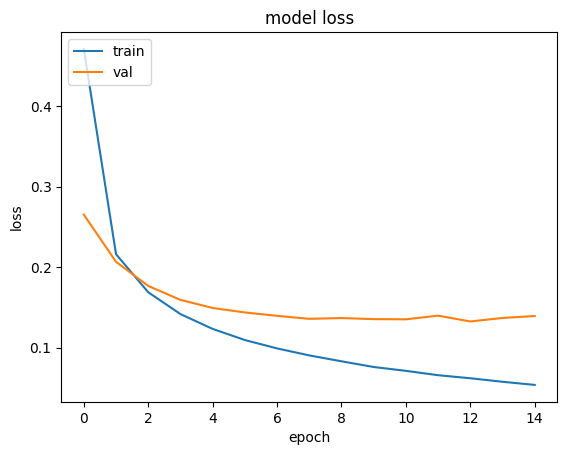

In [74]:
plt.plot(train.history['accuracy'])
plt.plot(train.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'Val'], loc='upper left')
plt.show()

# summarize history for loss

plt.plot(train.history['loss'])
plt.plot(train.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [75]:
# Model Building with dropout

#Intialize the model
model2 = tf.keras.models.Sequential()
model2.add(tf.keras.layers.Reshape((784,),input_shape=(28,28,)))

#Hidden layers
model2.add(tf.keras.layers.Dense(128, activation=LeakyReLU()))

#Dropout layer
model2.add(tf.keras.layers.Dropout(0.15))

model2.add(tf.keras.layers.Dense(256, activation=LeakyReLU()))
model2.add(tf.keras.layers.Dropout(0.15))

model2.add(tf.keras.layers.Dense(128, activation=LeakyReLU()))
model2.add(tf.keras.layers.Dropout(0.15))

model2.add(tf.keras.layers.Dense(64, activation=LeakyReLU()))
model2.add(tf.keras.layers.Dropout(0.15))

#Output layer
model2.add(tf.keras.layers.Dense(10, activation='softmax'))

In [76]:
model2.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape_4 (Reshape)         (None, 784)               0         
                                                                 
 dense_14 (Dense)            (None, 128)               100480    
                                                                 
 dropout_4 (Dropout)         (None, 128)               0         
                                                                 
 dense_15 (Dense)            (None, 256)               33024     
                                                                 
 dropout_5 (Dropout)         (None, 256)               0         
                                                                 
 dense_16 (Dense)            (None, 128)               32896     
                                                                 
 dropout_6 (Dropout)         (None, 128)              

In [77]:
model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


chkpt = ModelCheckpoint('/content/checkpoint', monitor='val_loss', save_best_only=True,save_freq='epoch')
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience = 5,restore_best_weights=True)

In [78]:
# Fitting the model

train2 = model2.fit(X_train_std, Y_train_cat,
                  validation_data=(X_val_std,Y_val_cat),
                  epochs=10,batch_size=32,
                  callbacks=callback)

Epoch 1/10
1500/1500 [==============================] - 11s 6ms/step - loss: 0.3377 - accuracy: 0.8961 - val_loss: 0.1867 - val_accuracy: 0.9431
Epoch 2/10
1500/1500 [==============================] - 12s 8ms/step - loss: 0.2018 - accuracy: 0.9405 - val_loss: 0.1425 - val_accuracy: 0.9587
Epoch 3/10
1500/1500 [==============================] - 12s 8ms/step - loss: 0.1642 - accuracy: 0.9500 - val_loss: 0.1290 - val_accuracy: 0.9611
Epoch 4/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.1475 - accuracy: 0.9547 - val_loss: 0.1365 - val_accuracy: 0.9605
Epoch 5/10
1500/1500 [==============================] - 11s 7ms/step - loss: 0.1353 - accuracy: 0.9589 - val_loss: 0.1221 - val_accuracy: 0.9632
Epoch 6/10
1500/1500 [==============================] - 10s 7ms/step - loss: 0.1252 - accuracy: 0.9616 - val_loss: 0.1148 - val_accuracy: 0.9673
Epoch 7/10
1500/1500 [==============================] - 10s 7ms/step - loss: 0.1172 - accuracy: 0.9648 - val_loss: 0.1185 - val_acc

In [79]:
y_pred_dropout = np.argmax(model2.predict(X_test_std), axis=1)
y_pred_dropout

313/313 [==============================] - 1s 2ms/step


array([7, 2, 1, ..., 4, 5, 6])

In [80]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred_dropout)

array([[ 965,    0,    1,    0,    3,    1,    3,    1,    2,    4],
       [   0, 1123,    4,    0,    0,    1,    2,    0,    5,    0],
       [   1,    0, 1011,    5,    4,    0,    1,    5,    5,    0],
       [   0,    0,   10,  974,    2,   11,    0,    5,    6,    2],
       [   0,    0,    2,    0,  964,    0,    4,    3,    2,    7],
       [   2,    0,    0,    7,    0,  867,    5,    0,   10,    1],
       [   6,    3,    0,    0,   11,    5,  924,    0,    9,    0],
       [   1,    5,   12,    2,    0,    1,    0, 1001,    0,    6],
       [   3,    1,    4,    4,    3,    3,    2,    3,  946,    5],
       [   2,    4,    0,    5,    8,    5,    0,    2,    1,  982]])

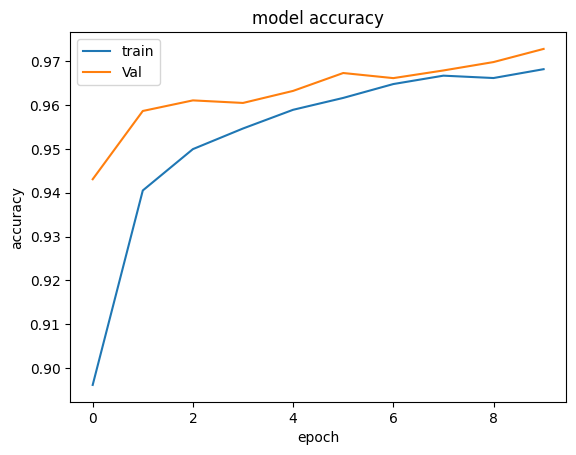

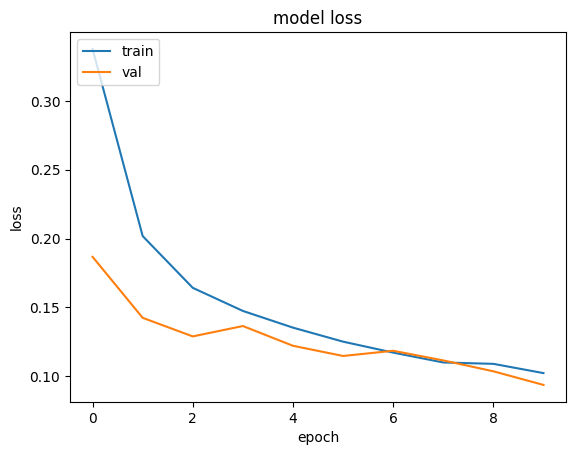

In [81]:
plt.plot(train2.history['accuracy'])
plt.plot(train2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'Val'], loc='upper left')
plt.show()

# summarize history for loss

plt.plot(train2.history['loss'])
plt.plot(train2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [82]:
# Model Building with Batch Normalization and other hyperparameters

# Create another Deep Neural Network Model for classsification to experiment with other hyper-parameters.

In [83]:
# Intialize the model

model_3 = tf.keras.models.Sequential()
model_3.add(tf.keras.layers.Reshape((784,),input_shape=(28,28,)))

# Add new layer

model_3.add(Dense(256,activation='relu', kernel_initializer=HeUniform(seed=7)))

# BN for regularization to prevent overefitting

model_3.add(BatchNormalization(momentum=0.6))

model_3.add(Dense(128, activation='relu',kernel_initializer=HeUniform(seed=7)))
model_3.add(BatchNormalization(momentum=0.6))

model_3.add(Dense(64, activation='relu',kernel_initializer=HeUniform(seed=7)))
model_3.add(BatchNormalization(momentum=0.6))

model_3.add(Dense(32, activation='relu',kernel_initializer=HeUniform(seed=7)))

# Output layer

model_3.add(tf.keras.layers.Dense(10, activation='softmax'))

In [84]:
model_3.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape_5 (Reshape)         (None, 784)               0         
                                                                 
 dense_19 (Dense)            (None, 256)               200960    
                                                                 
 batch_normalization_3 (Batc  (None, 256)              1024      
 hNormalization)                                                 
                                                                 
 dense_20 (Dense)            (None, 128)               32896     
                                                                 
 batch_normalization_4 (Batc  (None, 128)              512       
 hNormalization)                                                 
                                                                 
 dense_21 (Dense)            (None, 64)               

In [85]:
chkpt = ModelCheckpoint('/content/checkpoint', monitor='val_loss', save_best_only=True,save_freq='epoch')

callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience = 5,restore_best_weights=True)

model_3.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005),
              loss='categorical_crossentropy', metrics=['accuracy'])

In [86]:
# Train the model

train_3 = model_3.fit(X_train_std,Y_train_cat,
          validation_data=(X_val_std,Y_val_cat),
          epochs=40, batch_size=32, callbacks=[callback,chkpt])

Epoch 1/40
1495/1500 [============================>.] - ETA: 0s - loss: 0.3374 - accuracy: 0.9010

1500/1500 [==============================] - 18s 10ms/step - loss: 0.3371 - accuracy: 0.9011 - val_loss: 0.1342 - val_accuracy: 0.9597
Epoch 2/40
1498/1500 [============================>.] - ETA: 0s - loss: 0.1385 - accuracy: 0.9574

1500/1500 [==============================] - 15s 10ms/step - loss: 0.1386 - accuracy: 0.9574 - val_loss: 0.1090 - val_accuracy: 0.9678
Epoch 3/40
1494/1500 [============================>.] - ETA: 0s - loss: 0.1030 - accuracy: 0.9677

1500/1500 [==============================] - 16s 11ms/step - loss: 0.1031 - accuracy: 0.9676 - val_loss: 0.1056 - val_accuracy: 0.9682
Epoch 4/40
1497/1500 [============================>.] - ETA: 0s - loss: 0.0822 - accuracy: 0.9736

1500/1500 [==============================] - 15s 10ms/step - loss: 0.0822 - accuracy: 0.9736 - val_loss: 0.1002 - val_accuracy: 0.9706
Epoch 5/40
1500/1500 [==============================] - ETA: 0s - loss: 0.0708 - accuracy: 0.9776

1500/1500 [==============================] - 16s 11ms/step - loss: 0.0708 - accuracy: 0.9776 - val_loss: 0.0955 - val_accuracy: 0.9722
Epoch 6/40
1500/1500 [==============================] - ETA: 0s - loss: 0.0616 - accuracy: 0.9805

1500/1500 [==============================] - 17s 11ms/step - loss: 0.0616 - accuracy: 0.9805 - val_loss: 0.0888 - val_accuracy: 0.9737
Epoch 7/40
1499/1500 [============================>.] - ETA: 0s - loss: 0.0548 - accuracy: 0.9825

1500/1500 [==============================] - 15s 10ms/step - loss: 0.0548 - accuracy: 0.9825 - val_loss: 0.0872 - val_accuracy: 0.9751
Epoch 8/40
1500/1500 [==============================] - 11s 8ms/step - loss: 0.0495 - accuracy: 0.9844 - val_loss: 0.0965 - val_accuracy: 0.9738
Epoch 9/40
1500/1500 [==============================] - 12s 8ms/step - loss: 0.0451 - accuracy: 0.9851 - val_loss: 0.0941 - val_accuracy: 0.9741
Epoch 10/40
1500/1500 [==============================] - 13s 9ms/step - loss: 0.0401 - accuracy: 0.9867 - val_loss: 0.0907 - val_accuracy: 0.9749
Epoch 11/40
1500/1500 [==============================] - 12s 8ms/step - loss: 0.0363 - accuracy: 0.9882 - val_loss: 0.0958 - val_accuracy: 0.9747
Epoch 12/40
1498/1500 [============================>.] - ETA: 0s - loss: 0.0347 - accuracy: 0.9886

1500/1500 [==============================] - 15s 10ms/step - loss: 0.0346 - accuracy: 0.9886 - val_loss: 0.0833 - val_accuracy: 0.9779
Epoch 13/40
1500/1500 [==============================] - 13s 8ms/step - loss: 0.0299 - accuracy: 0.9905 - val_loss: 0.0877 - val_accuracy: 0.9771
Epoch 14/40
1500/1500 [==============================] - 13s 9ms/step - loss: 0.0289 - accuracy: 0.9908 - val_loss: 0.0970 - val_accuracy: 0.9757
Epoch 15/40
1500/1500 [==============================] - 12s 8ms/step - loss: 0.0272 - accuracy: 0.9909 - val_loss: 0.0862 - val_accuracy: 0.9775
Epoch 16/40
1500/1500 [==============================] - 14s 9ms/step - loss: 0.0253 - accuracy: 0.9915 - val_loss: 0.0890 - val_accuracy: 0.9776
Epoch 17/40
1500/1500 [==============================] - 13s 9ms/step - loss: 0.0249 - accuracy: 0.9910 - val_loss: 0.1015 - val_accuracy: 0.9751


In [87]:
y_pred_BN = model_3.predict(X_test_std)

313/313 [==============================] - 1s 3ms/step


In [88]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[ 965,    0,    2,    1,    0,    3,    7,    1,    1,    0],
       [   0, 1115,    2,    3,    0,    0,    5,    3,    7,    0],
       [   6,    1,  979,    4,    8,    2,    4,    7,   19,    2],
       [   0,    0,    6,  968,    0,   12,    0,    9,   10,    5],
       [   3,    0,    3,    0,  937,    0,   13,    5,    1,   20],
       [   2,    0,    1,   14,    2,  846,   10,    2,   11,    4],
       [   9,    3,    1,    0,    2,   10,  931,    1,    1,    0],
       [   2,    5,   13,    5,    5,    0,    0,  989,    2,    7],
       [   5,    3,    3,    4,    5,    5,    2,    5,  937,    5],
       [   3,    5,    0,    5,   17,    8,    1,    7,    5,  958]])

In [89]:
# In the above model built with Batch Normalization we see that the training accuracy is 0.99 and the test accuracy is 0.98.

# With batch normalization we see that both the train and test accuracy is better than the previous 2 models.

Text(0.5, 1.0, 'Training and validation loss')

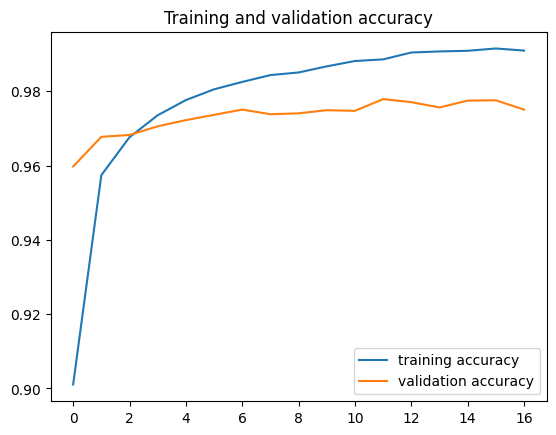

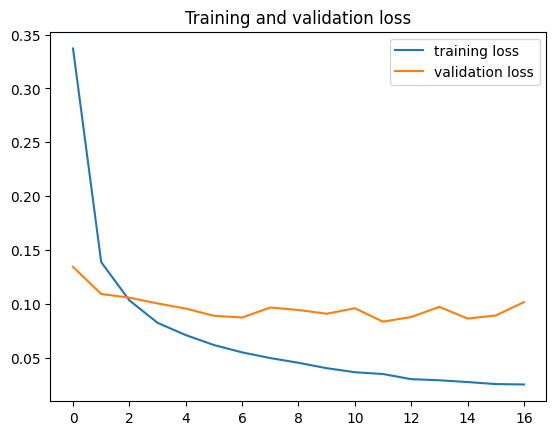

In [90]:
accuracy = train_3.history['accuracy']
val_accuracy = train_3.history['val_accuracy']
loss = train_3.history['loss']
val_loss = train_3.history['val_loss']

epochs = range(len(accuracy)) # Get number of epochs

plt.plot(epochs, accuracy, label = 'training accuracy' )
plt.plot(epochs, val_accuracy, label = 'validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc = 'lower right')
plt.figure()

plt.plot(epochs, loss, label = 'training loss' )
plt.plot(epochs, val_loss, label = 'validation loss')
plt.legend(loc = 'upper right')
plt.title('Training and validation loss')